In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-student-placement/CollegePlacement.csv


In [2]:
# TO AVOID WARNING
import warnings

# Ignore only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# LETS LOAD DATASET
df =  pd.read_csv("/kaggle/input/college-student-placement/CollegePlacement.csv")
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


## About the Dataset

**College Student Placement Dataset**  
A realistic, large-scale synthetic dataset of **10,000 students** designed to analyze factors affecting college placements.

---

### Dataset Description

This dataset simulates the **academic and professional profiles** of 10,000 college students, focusing on factors that influence **placement outcomes**.  

It includes features such as:  

- **IQ** – Intelligence quotient of the student  
- **Prev_Sem_Result** – Previous semester academic performance  
- **CGPA** – Cumulative grade point average  
- **Academic_Performance** – Overall academic rating  
- **Internship_Experience** – Whether the student has completed internships  
- **Communication_Skills** – Score evaluating communication ability  
- **Projects_Completed** – Number of projects completed  
- **Extra_Curricular_Score** – Participation in extracurricular activities  
- **College_ID** – Identifier for the college attended  
- **Placement** – Target variable indicating if the student was placed  

This dataset is ideal for **exploratory data analysis, feature engineering, and predictive modeling** to understand the key factors driving college placements.


In [4]:
# LETS UNDERSTAND ABOUT DATASET
print(f"shape of dataset is {df.shape}")
print("\n ======================================================================\n")
print(f"columns present in the dataset are {df.columns}")
print("\n ======================================================================\n")
print(f"columns present in the dataset with there datatypes\n {df.dtypes}")
print("\n ======================================================================\n")
print(f"information about dataset \n {df.info()}")
print("\n ======================================================================\n")
print(f"data discritbtion of every numerical feature \n{df.describe()}")
print("\n ======================================================================\n")
print(f"data describtion of non numerical datatype \n {df.describe(include=['float64','int64'])}")
print("\n ======================================================================\n")
print(f"numercial columns in dataset are {df.select_dtypes(include = ['float','int']).columns.to_list()}")
print("\n ======================================================================\n")
print(f"non numerical columns in dataset are {df.select_dtypes(include = 'O').columns.to_list()}")

shape of dataset is (10000, 10)


columns present in the dataset are Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')


columns present in the dataset with there datatypes
 College_ID                 object
IQ                          int64
Prev_Sem_Result           float64
CGPA                      float64
Academic_Performance        int64
Internship_Experience      object
Extra_Curricular_Score      int64
Communication_Skills        int64
Projects_Completed          int64
Placement                  object
dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                     

In [5]:
# LETS CHECK THE NULL VALUES AND DUPLICATES
# LETS DISTRIBUTE COLUMNS WITH ON VALUES DISTRIBUTION FOR EASY VISULIZATION
catcol = []
numcol = []
midcol = []
for col in df.columns:
    if df[col].isna().sum() == 0:
        print(f"THERE NO NULL VALUES PRESENT IN {col}")
        
        # lets check for values
        val = df[col].nunique()
        
        print(f"NUMBER OF UNIQUE VALUES PRESENT IN {col} ARE {val}")
        if (val >0 and val<12):
            catcol.append(col)
        elif(val>12 and val<50):
            midcol.append(col)
        else:
            numcol.append(col)
        
        print("\n"+"="*80+"\n")
    else:
        print(f"IN {col} HAS NULL VALUES ")

        val = df[col].nunique()
        
        print(f"NUMBER OF UNIQUE VALUES PRESENT IN {col} ARE {val}")
        if (val >0 and val<12):
            catcol.append(col)
        elif(val>12 and val<50):
            midcol.append(col)
        else:
            numcol.append(col)

        print("\n"+"="*80+"\n")

print(f"numercail columns are {numcol}\n")
print(f"categorical columns are {catcol}\n")
print(f"mid values columns are {midcol}\n")


THERE NO NULL VALUES PRESENT IN College_ID
NUMBER OF UNIQUE VALUES PRESENT IN College_ID ARE 100


THERE NO NULL VALUES PRESENT IN IQ
NUMBER OF UNIQUE VALUES PRESENT IN IQ ARE 104


THERE NO NULL VALUES PRESENT IN Prev_Sem_Result
NUMBER OF UNIQUE VALUES PRESENT IN Prev_Sem_Result ARE 501


THERE NO NULL VALUES PRESENT IN CGPA
NUMBER OF UNIQUE VALUES PRESENT IN CGPA ARE 590


THERE NO NULL VALUES PRESENT IN Academic_Performance
NUMBER OF UNIQUE VALUES PRESENT IN Academic_Performance ARE 10


THERE NO NULL VALUES PRESENT IN Internship_Experience
NUMBER OF UNIQUE VALUES PRESENT IN Internship_Experience ARE 2


THERE NO NULL VALUES PRESENT IN Extra_Curricular_Score
NUMBER OF UNIQUE VALUES PRESENT IN Extra_Curricular_Score ARE 11


THERE NO NULL VALUES PRESENT IN Communication_Skills
NUMBER OF UNIQUE VALUES PRESENT IN Communication_Skills ARE 10


THERE NO NULL VALUES PRESENT IN Projects_Completed
NUMBER OF UNIQUE VALUES PRESENT IN Projects_Completed ARE 6


THERE NO NULL VALUES PRESENT IN 

In [6]:
# lets understand the distribution of placement with respect to colleges
# for col in numcol[1:]:


pivot = pd.pivot_table(
    df,
    index='College_ID',   # categorical column
    values= numcol[1:],
    aggfunc=["mean","median","max","min"]
).reset_index()

pivot

    

College_ID      mean                             median         \
                   CGPA          IQ Prev_Sem_Result   CGPA     IQ   
0     CLG0001  7.587890   98.522936        7.553761  7.550   99.0   
1     CLG0002  7.627326  101.639535        7.650465  7.795  102.0   
2     CLG0003  7.596598  100.804124        7.601031  7.720  100.0   
3     CLG0004  7.597363   98.857143        7.592967  7.690   99.0   
4     CLG0005  7.243393  100.616071        7.249911  6.985  102.0   
..        ...       ...         ...             ...    ...    ...   
95    CLG0096  7.663333  100.575758        7.680404  7.630  101.0   
96    CLG0097  7.556832  100.118812        7.578317  7.510   99.0   
97    CLG0098  7.579714  100.085714        7.590190  7.530  102.0   
98    CLG0099  7.630449   99.471910        7.649775  7.560  101.0   
99    CLG0100  7.315361  100.041237        7.309175  7.150   98.0   

                      max                        min                      
   Prev_Sem_Result   CGPA   IQ Prev_Sem_Result  CGPA  IQ Prev_Sem_Result  
0            7.410  10.38  139            9.88  4.77  62            5.05  
1            7.815  10.14  144            9.98  4.93  68            5.08  
2            7.810  10.37  144            9.99  4.96  64            5.11  
3            7.580  10.11  128           10.00  4.64  51            5.00  
4            7.215  10.08  131            9.90  4.58  65            5.01  
..             ...    ...  ...             ...   ...  ..             ...  
95           7.640  10.35  134            9.97  5.06  73            5.06  
96           7.630   9.99  132            9.95  4.69  66            5.00  
97           7.690   9.95  134            9.93  5.14  68            5.07  
98           7.580  10.37  132            9.98  4.94  62            5.05  
99           7.150  10.04  146            9.93  4.85  73            5.04  

[100 rows x 13 columns]

In [7]:
# LETS CHECK NUMBER OF PLACEMENT AS PER COLLEGE
print(f"placement per college \n {df.groupby('College_ID')['Placement'].value_counts()}")

placement per college 
 College_ID  Placement
CLG0001     No           98
            Yes          11
CLG0002     No           74
            Yes          12
CLG0003     No           80
                         ..
CLG0098     Yes          16
CLG0099     No           75
            Yes          14
CLG0100     No           80
            Yes          17
Name: count, Length: 200, dtype: int64


# 📊 Dataset Observations

## 1. General Information
- The dataset contains **10,000 rows** and **10 columns**.  
- Shape of dataset: **(10000, 10)**.  
- Columns include a mix of **numerical** and **categorical** features.  
- No **missing/null values** are present in the dataset. ✅  

---

## 2. Column-wise Observations

### 🔹 Categorical / Object Columns
- **College_ID**
  - No null values.
  - **100 unique values** → represents different colleges.
  
- **Internship_Experience**
  - No null values.
  - **2 unique values** → likely `Yes` / `No` or similar.
  
- **Placement**
  - No null values.
  - **2 unique values** → likely `Placed` / `Not Placed`.

---

### 🔹 Numerical Columns
- **IQ**
  - Range: **41 – 158**  
  - Mean ≈ **99.47**, Std ≈ **15.05**  
  - Distribution appears to follow a normal-like spread around 100.  

- **Prev_Sem_Result**
  - Range: **5.0 – 10.0**  
  - Mean ≈ **7.53**  
  - Higher scores cluster around 6–9.  

- **CGPA**
  - Range: **4.54 – 10.46**  
  - Mean ≈ **7.53**, Std ≈ **1.47**  
  - Most students have CGPA between **6.3 – 8.7** (IQR).  

- **Academic_Performance**
  - Range: **1 – 10**  
  - Mean ≈ **5.54**  
  - Balanced distribution with possible skew toward mid/high values.  

- **Extra_Curricular_Score**
  - Range: **0 – 10**  
  - Mean ≈ **4.97**  
  - Some students score very low (0) while others achieve maximum.  

- **Communication_Skills**
  - Range: **1 – 10**  
  - Mean ≈ **5.56**  
  - Median ≈ 6 → balanced distribution around the mid-point.  

- **Projects_Completed**
  - Range: **0 – 5**  
  - Mean ≈ **2.51**  
  - Most students complete **1–4 projects**, very few at extremes.  

---

## 3. Key Takeaways
- Dataset is **clean** (no missing values).  
- Contains a mix of **academic, skills, and extra-curricular factors**.  
- Target variable appears to be **Placement** (binary classification).  
- Potential predictors:
  - **IQ, Prev_Sem_Result, CGPA, Academic Performance, Extra-Curricular Score, Communication Skills, Projects Completed, Internship Experience**.  
- College_ID may serve as an identifier or could indicate institutional differences.  

---


## VISULIZATION

In [8]:
# IMPORT LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns


Placement
No     8341
Yes    1659
Name: count, dtype: int64


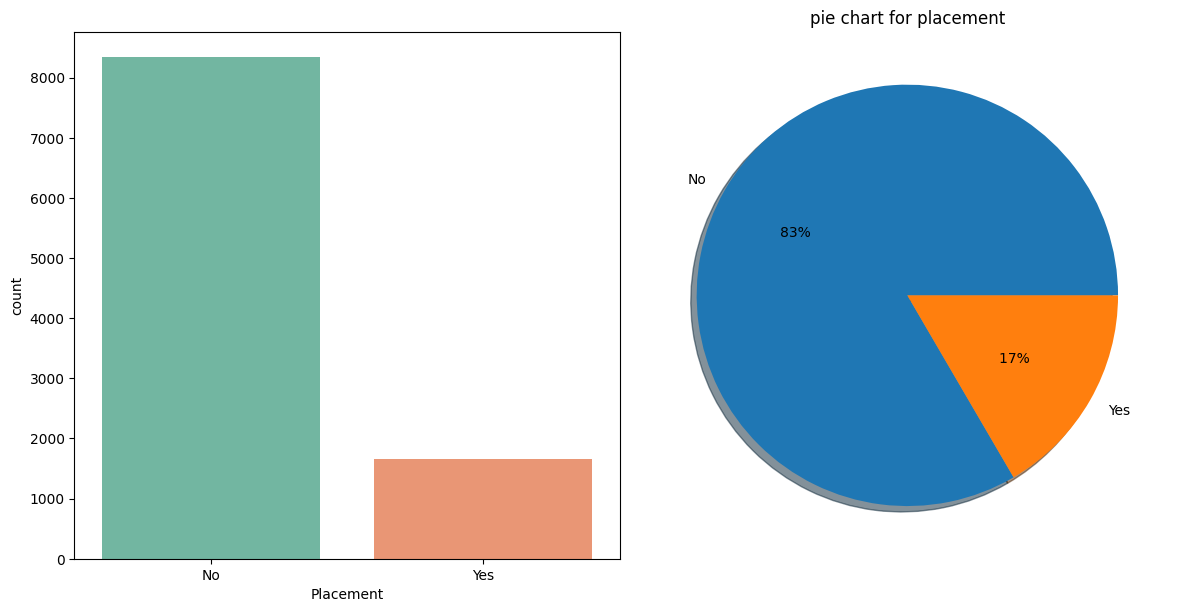

In [9]:
# lets understand the distribution for our target variable
fig,ax = plt.subplots(1,2,figsize = (12,6))
print(df["Placement"].value_counts())
sns.countplot(x = "Placement",data = df ,palette = "Set2",ax = ax[0])
ax[1].pie(df["Placement"].value_counts(),labels =df["Placement"].value_counts().index, autopct = "%0.0f%% ",shadow =True)
plt.tight_layout()
ax[1].set_title(f"pie chart for placement")
plt.show()

In [10]:
# THIS MIGHT SHOW THAT OUR DATASET IS NOT BALANCED MAY AFFECT OUR CLASSIFICATION


target feature distribution for  Academic_Performance 
Academic_Performance  Placement
1                     No           793
                      Yes          170
2                     No           828
                      Yes          167
3                     No           816
                      Yes          175
4                     No           816
                      Yes          188
5                     No           817
                      Yes          157
6                     No           843
                      Yes          147
7                     No           878
                      Yes          149
8                     No           852
                      Yes          173
9                     No           824
                      Yes          163
10                    No           874
                      Yes          170
Name: count, dtype: int64


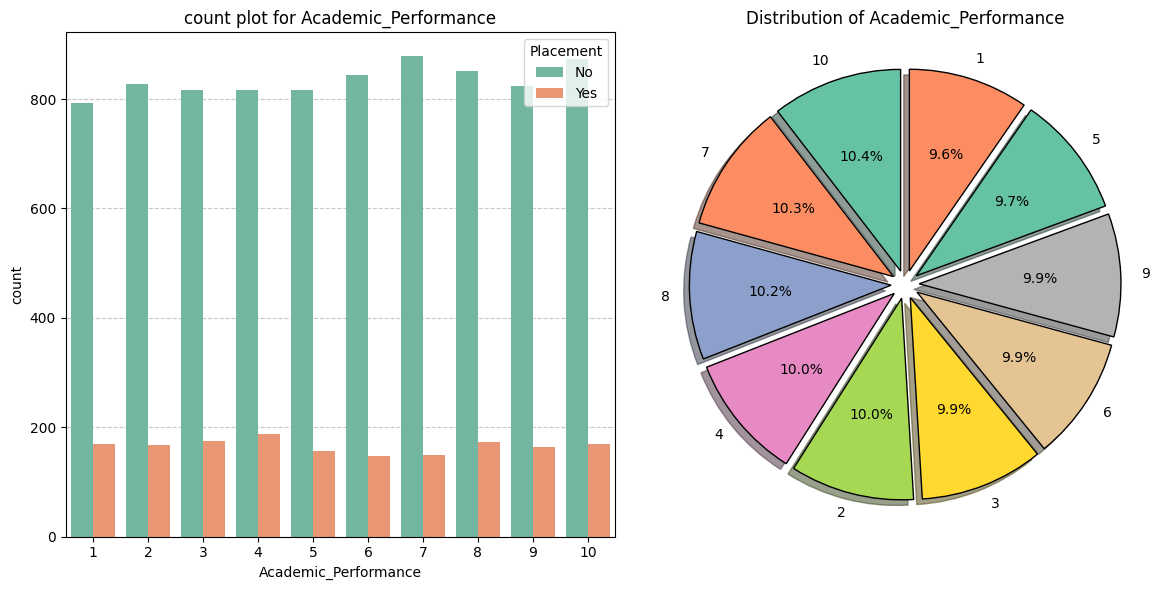

target feature distribution for  Internship_Experience 
Internship_Experience  Placement
No                     No           5024
                       Yes          1012
Yes                    No           3317
                       Yes           647
Name: count, dtype: int64


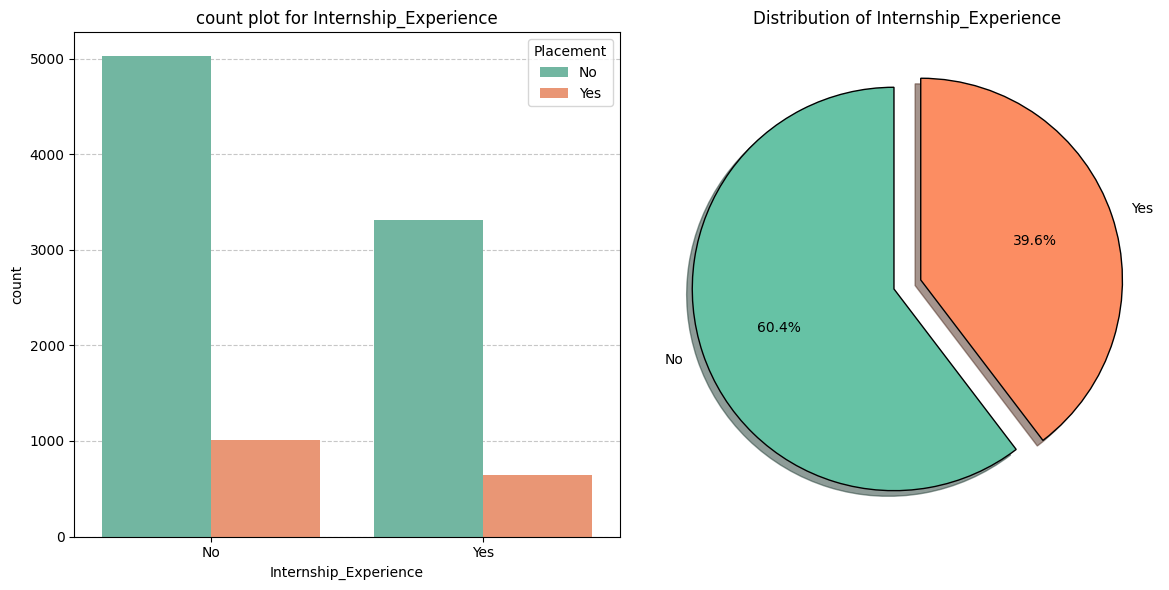

target feature distribution for  Extra_Curricular_Score 
Extra_Curricular_Score  Placement
0                       No           773
                        Yes          156
1                       No           732
                        Yes          171
2                       No           759
                        Yes          140
3                       No           811
                        Yes          154
4                       No           746
                        Yes          143
5                       No           764
                        Yes          164
6                       No           747
                        Yes          132
7                       No           737
                        Yes          153
8                       No           787
                        Yes          144
9                       No           756
                        Yes          149
10                      No           729
                        Yes          153
Name: c

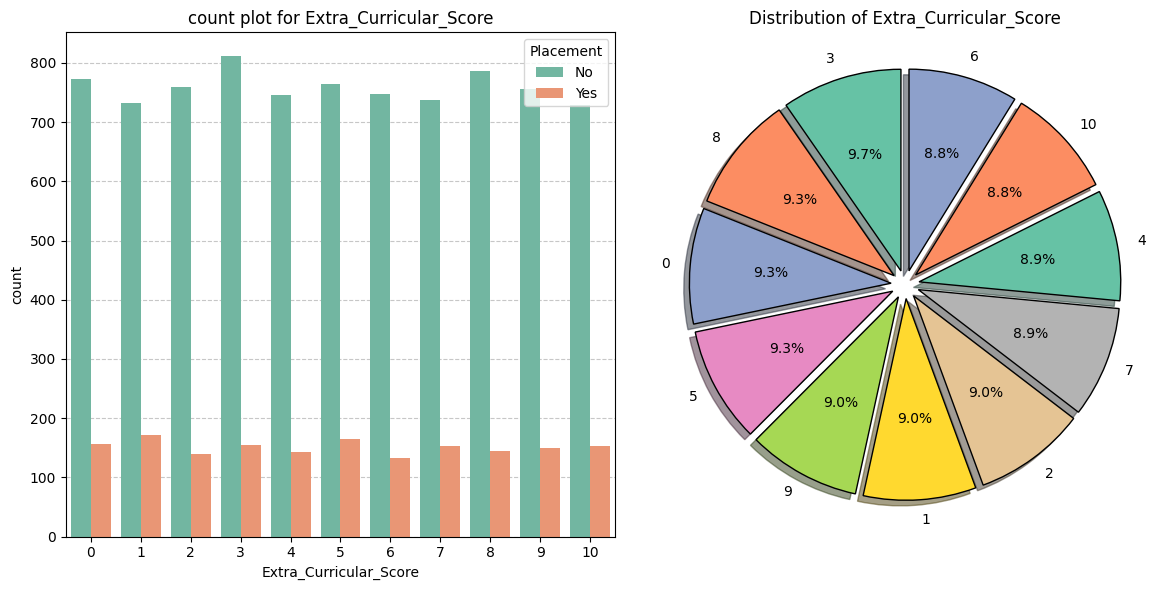

target feature distribution for  Communication_Skills 
Communication_Skills  Placement
1                     No           910
                      Yes           70
2                     No           941
                      Yes           67
3                     No           891
                      Yes           64
4                     No           954
                      Yes           63
5                     No           941
                      Yes           54
6                     No           886
                      Yes           56
7                     No           925
                      Yes           59
8                     No           602
                      Yes          398
9                     No           599
                      Yes          417
10                    No           692
                      Yes          411
Name: count, dtype: int64


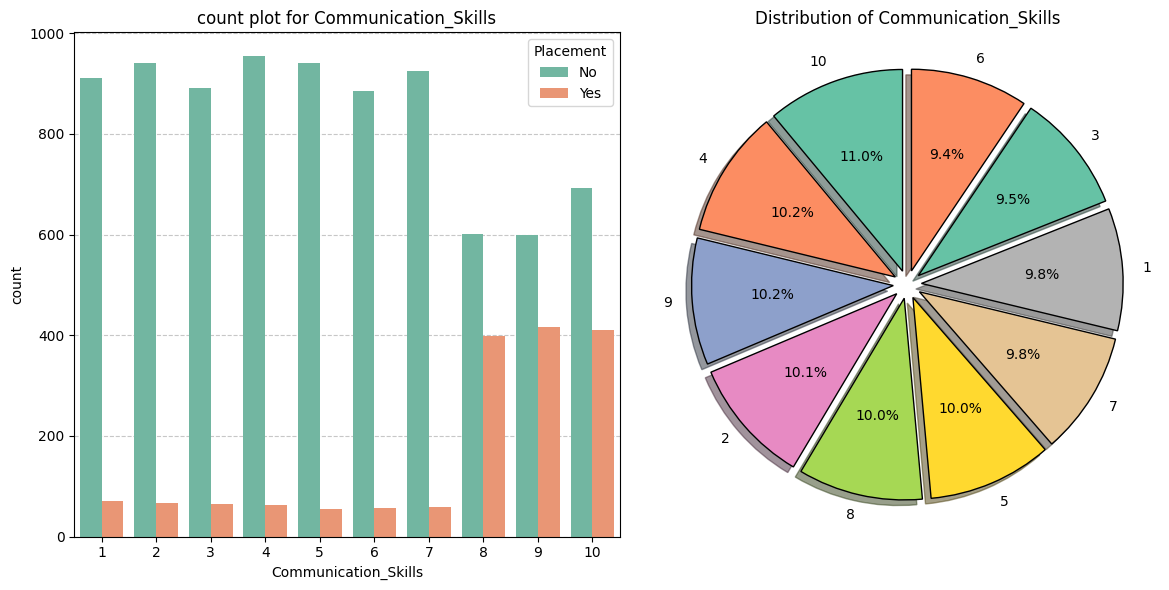

target feature distribution for  Projects_Completed 
Projects_Completed  Placement
0                   No           1643
                    Yes            45
1                   No           1576
                    Yes            33
2                   No           1274
                    Yes           407
3                   No           1238
                    Yes           389
4                   No           1312
                    Yes           381
5                   No           1298
                    Yes           404
Name: count, dtype: int64


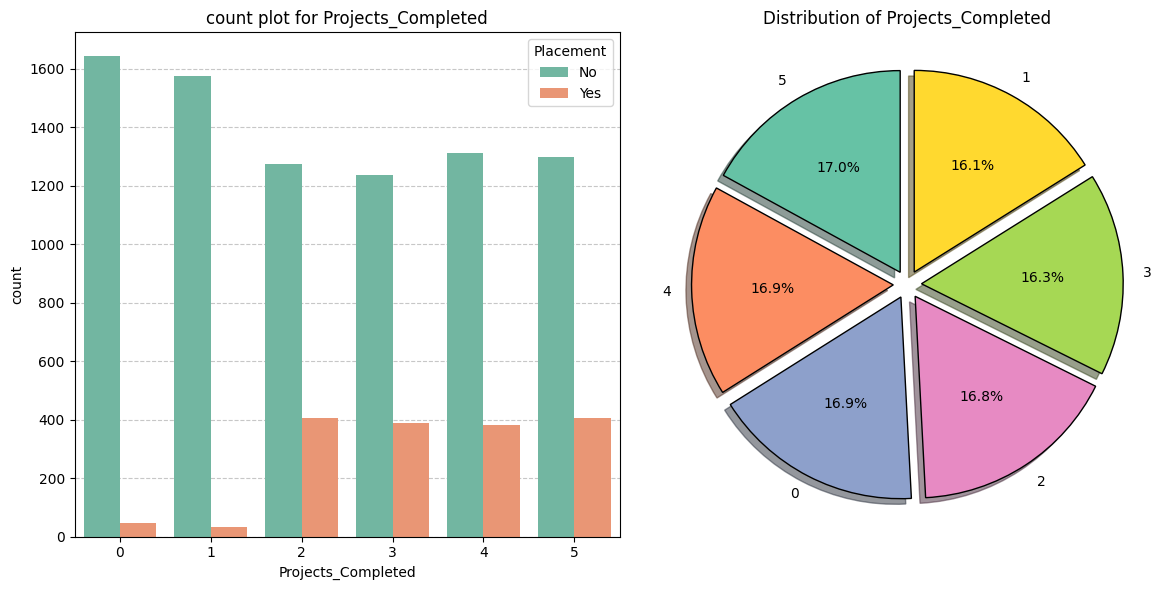

target feature distribution for  Placement 
Placement
No     8341
Yes    1659
Name: count, dtype: int64


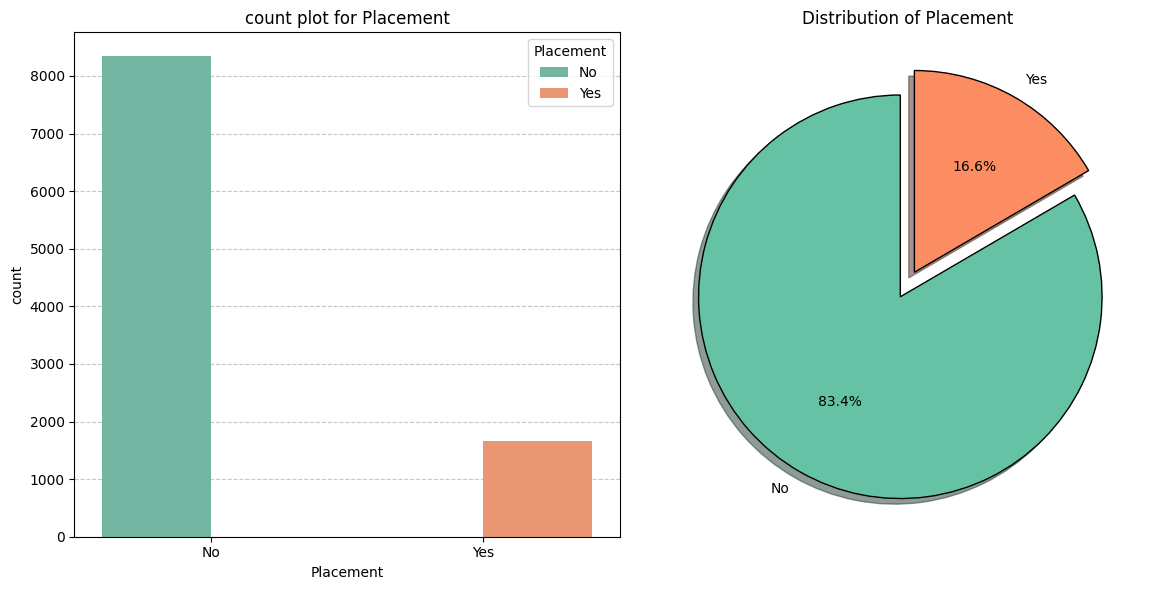

In [11]:
# lets plot for categorical columns
for col in catcol:
    # lets understand the distribution
    print(f"target feature distribution for  {col} ")
    print(df.groupby(col)["Placement"].value_counts())

    # visulization
    fig,ax = plt.subplots(1,2,figsize = (12,6))
    sns.countplot(x=col,data = df , palette = "Set2",hue = "Placement", ax = ax[0])
    ax[0].set_title(f"count plot for {col}")
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)
    ax[0].set_axisbelow(True)

    sizes = df[col].value_counts()
    labels = sizes.index
    explode = [0.07] * len(labels)  # explode all slices slightly
    colors = sns.color_palette("Set2", len(labels))  # consistent color palette

    ax[1].pie(
        sizes,
        labels=labels,
        autopct="%0.1f%%",   # show 1 decimal
        shadow=True,
        explode=explode,
        colors=colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )
    ax[1].set_title(f"Distribution of {col}")

    plt.tight_layout()
    plt.show()


In [12]:
print(df[numcol].dtypes)


College_ID          object
IQ                   int64
Prev_Sem_Result    float64
CGPA               float64
dtype: object


 distribution for  IQ with repect to our target variable
IQ   Placement
41   No           1
42   No           1
44   No           1
45   No           1
51   No           3
                 ..
148  Yes          1
150  Yes          1
152  No           1
157  No           1
158  Yes          1
Name: count, Length: 190, dtype: int64


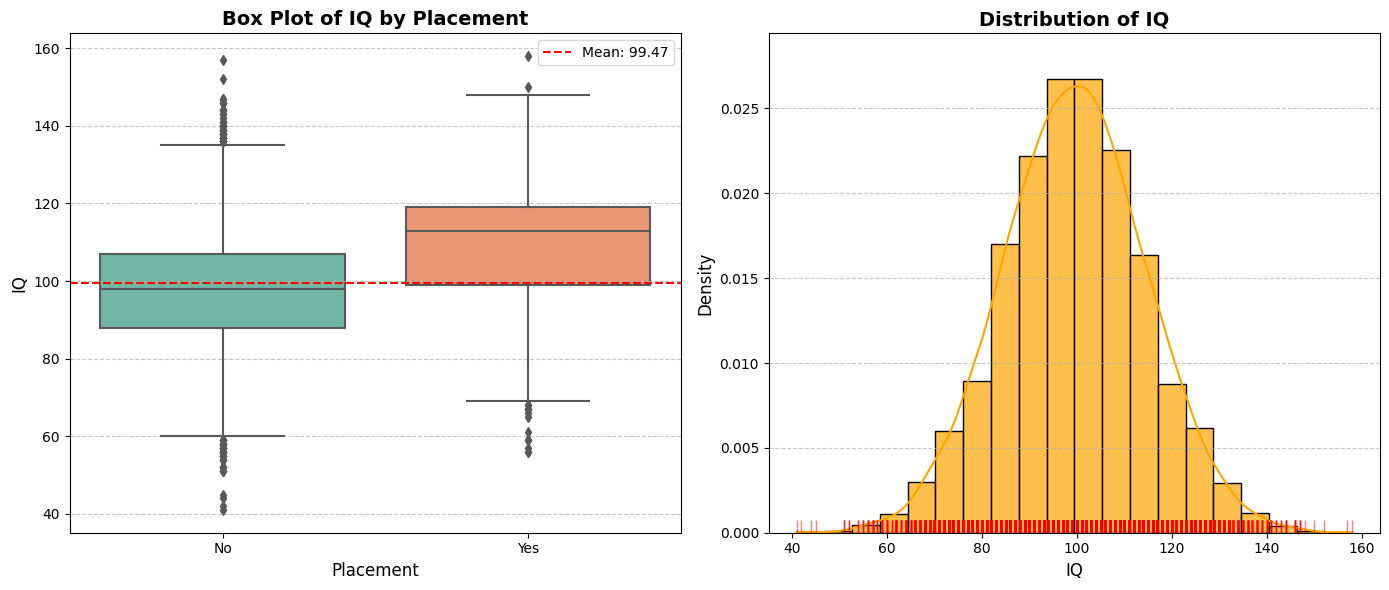

 distribution for  Prev_Sem_Result with repect to our target variable
Prev_Sem_Result  Placement
5.00             No           10
5.01             No           15
5.02             No           18
                 Yes           3
5.03             No           11
                              ..
9.98             Yes          11
9.99             No           21
                 Yes           9
10.00            No            4
                 Yes           4
Name: count, Length: 887, dtype: int64


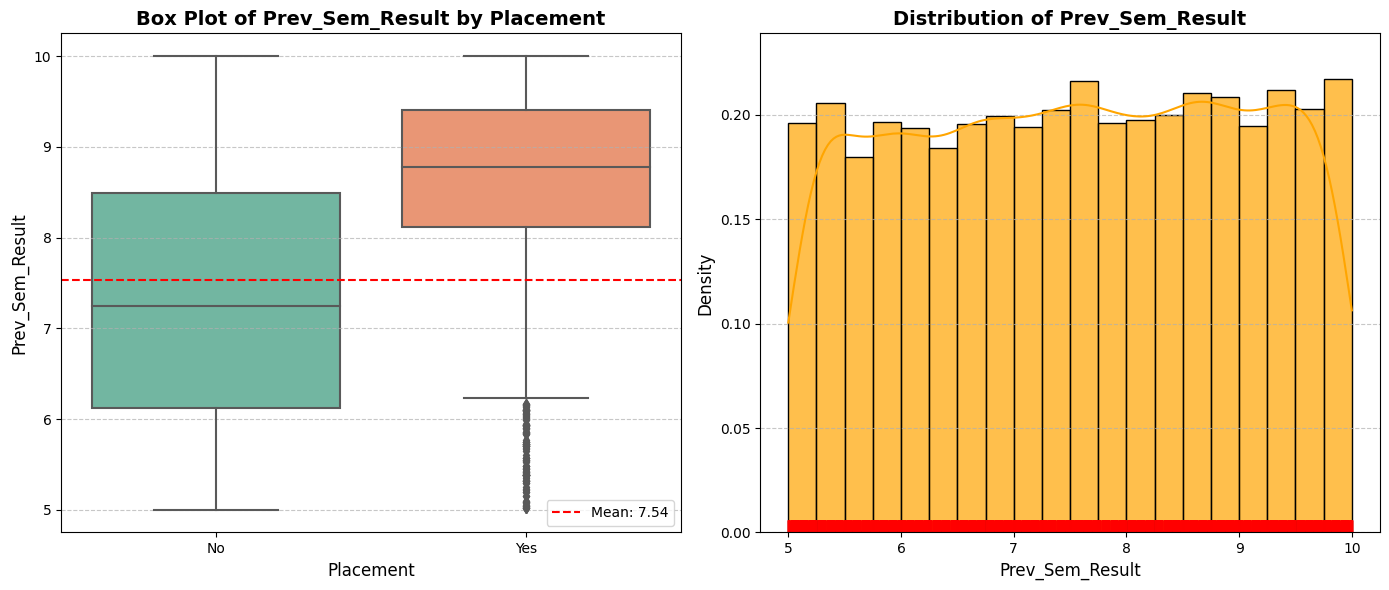

 distribution for  CGPA with repect to our target variable
CGPA   Placement
4.54   No           1
4.56   No           1
4.57   No           1
4.58   Yes          1
4.59   No           2
                   ..
10.42  No           2
10.44  No           1
10.45  No           2
10.46  No           1
       Yes          1
Name: count, Length: 1019, dtype: int64


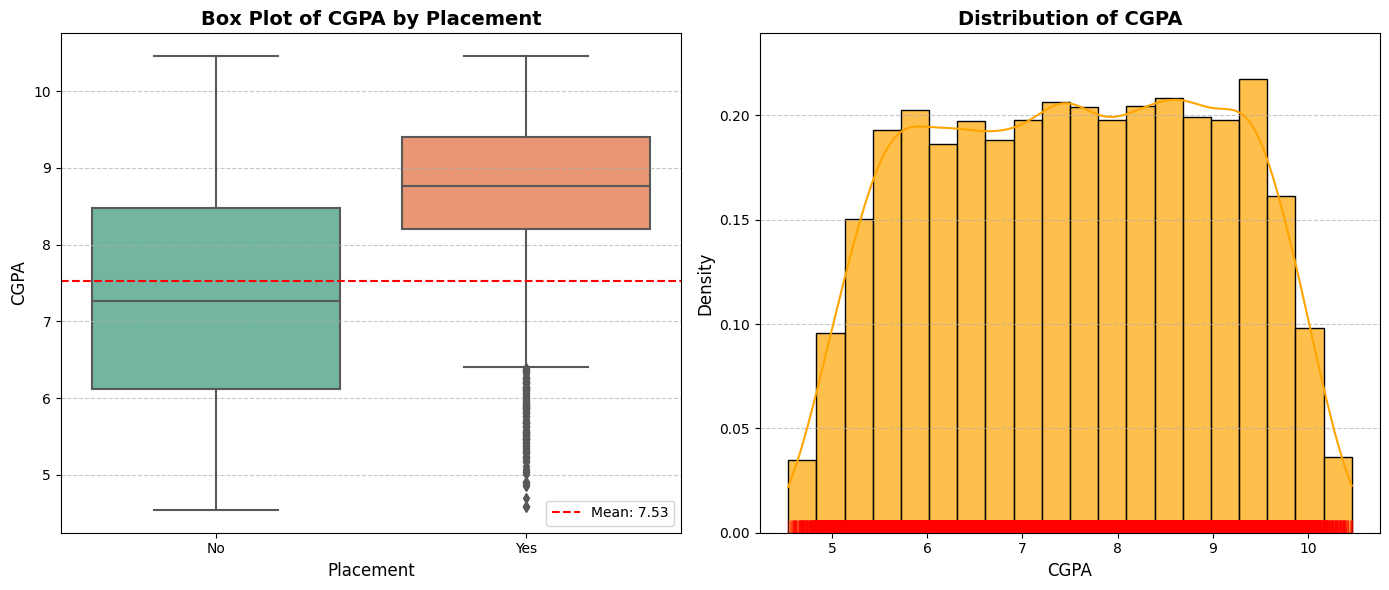

In [13]:
# lets plot for numerical columns
for col in numcol[1:]:
    # lets understand the churn disyribution
    print(f" distribution for  {col} with repect to our target variable")
    print(df.groupby(col)["Placement"].value_counts())

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1️⃣ Boxplot with target hue (if numeric target, skip hue)
    sns.boxplot(x="Placement", y=col, data=df, palette="Set2", ax=ax[0])
    ax[0].set_title(f"Box Plot of {col} by Placement", fontsize=14, fontweight='bold')
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)
    ax[0].set_xlabel("Placement", fontsize=12)
    ax[0].set_ylabel(col, fontsize=12)
    
    # Add mean marker
    mean_val = df[col].mean()
    ax[0].axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax[0].legend()


    
    sns.histplot(
        x=col,
        data=df,
        color="orange",
        edgecolor="black",
        kde=True,
        alpha=0.7,
        bins=20,
        ax=ax[1],
        stat="density"
    )
    sns.rugplot(x=col, data=df, color='red', alpha=0.5, ax=ax[1])
    ax[1].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    ax[1].set_xlabel(col, fontsize=12)
    ax[1].set_ylabel("Density", fontsize=12)
    ax[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tight layout for spacing
    plt.tight_layout()
    plt.show()

    Academic_Performance College_ID  Count
0                      1    CLG0094     18
1                      1    CLG0048     16
2                      1    CLG0023     15
3                      2    CLG0025     19
4                      2    CLG0057     19
5                      2    CLG0084     18
6                      3    CLG0086     20
7                      3    CLG0056     16
8                      3    CLG0012     15
9                      4    CLG0039     19
10                     4    CLG0022     18
11                     4    CLG0029     17
12                     5    CLG0046     22
13                     5    CLG0005     18
14                     5    CLG0017     18
15                     6    CLG0027     19
16                     6    CLG0065     18
17                     6    CLG0012     16
18                     7    CLG0029     17
19                     7    CLG0040     17
20                     7    CLG0049     17
21                     8    CLG0078     19
22         

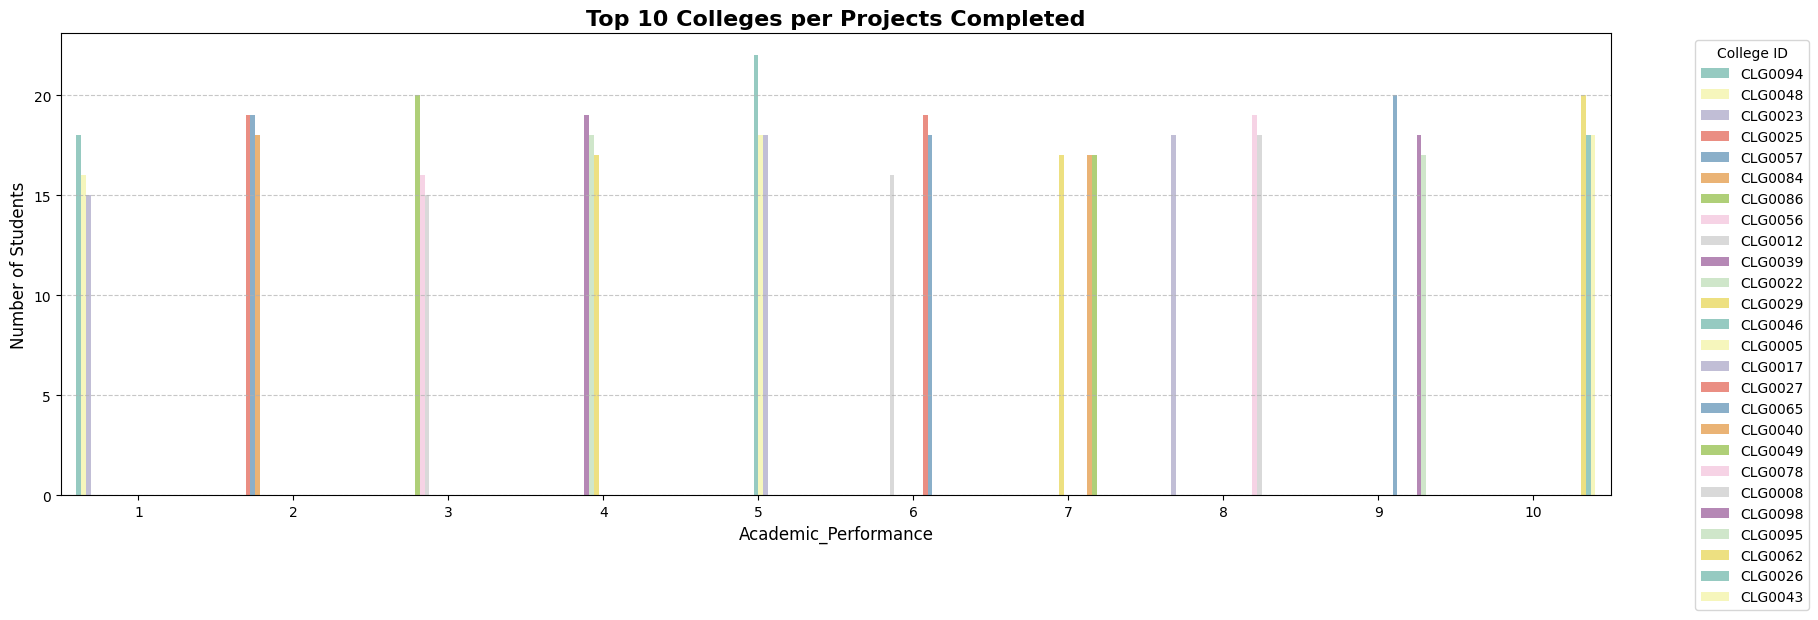

  Internship_Experience College_ID  Count
0                    No    CLG0023     82
1                    No    CLG0065     80
2                    No    CLG0075     80
3                   Yes    CLG0062     60
4                   Yes    CLG0066     54
5                   Yes    CLG0098     54


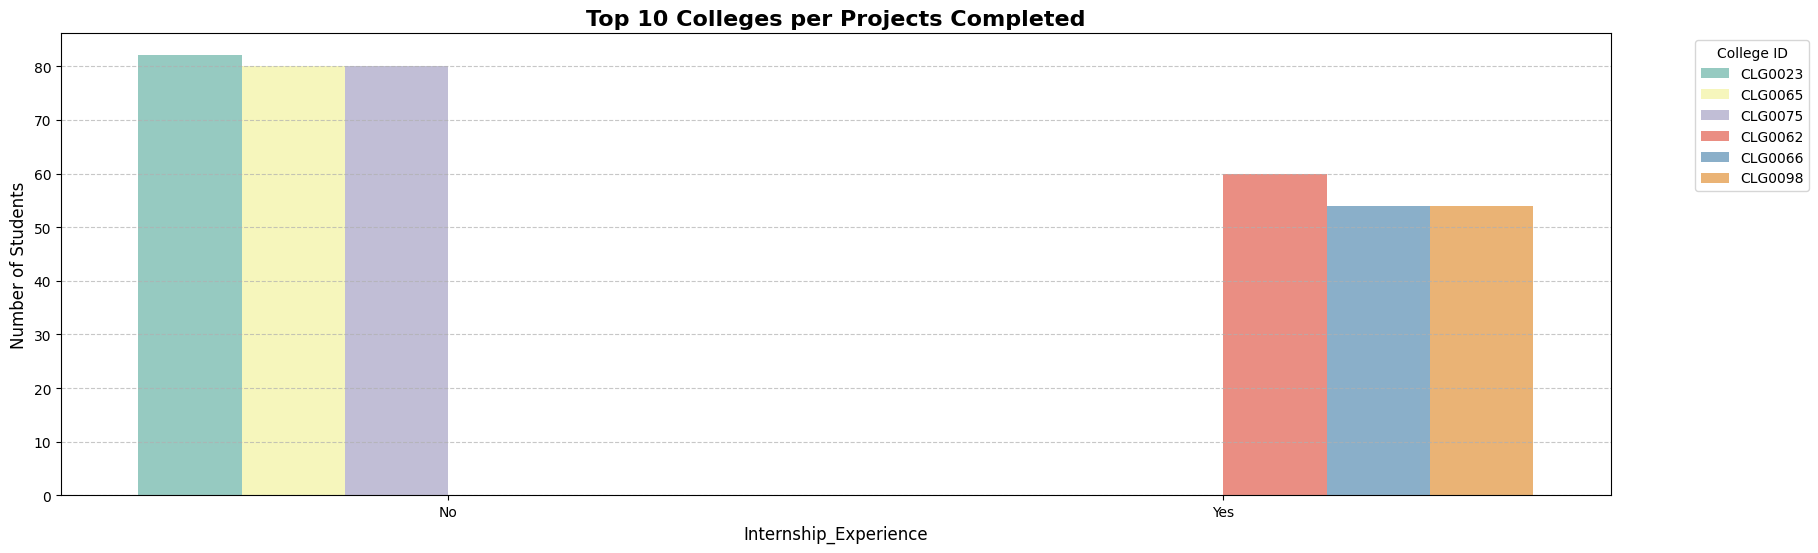

    Extra_Curricular_Score College_ID  Count
0                        0    CLG0022     19
1                        0    CLG0080     16
2                        0    CLG0026     15
3                        1    CLG0061     17
4                        1    CLG0062     17
5                        1    CLG0074     15
6                        2    CLG0075     18
7                        2    CLG0025     16
8                        2    CLG0001     14
9                        3    CLG0065     23
10                       3    CLG0078     18
11                       3    CLG0049     16
12                       4    CLG0029     15
13                       4    CLG0039     14
14                       4    CLG0040     14
15                       5    CLG0065     17
16                       5    CLG0072     17
17                       5    CLG0011     16
18                       6    CLG0041     16
19                       6    CLG0062     16
20                       6    CLG0058     15
21        

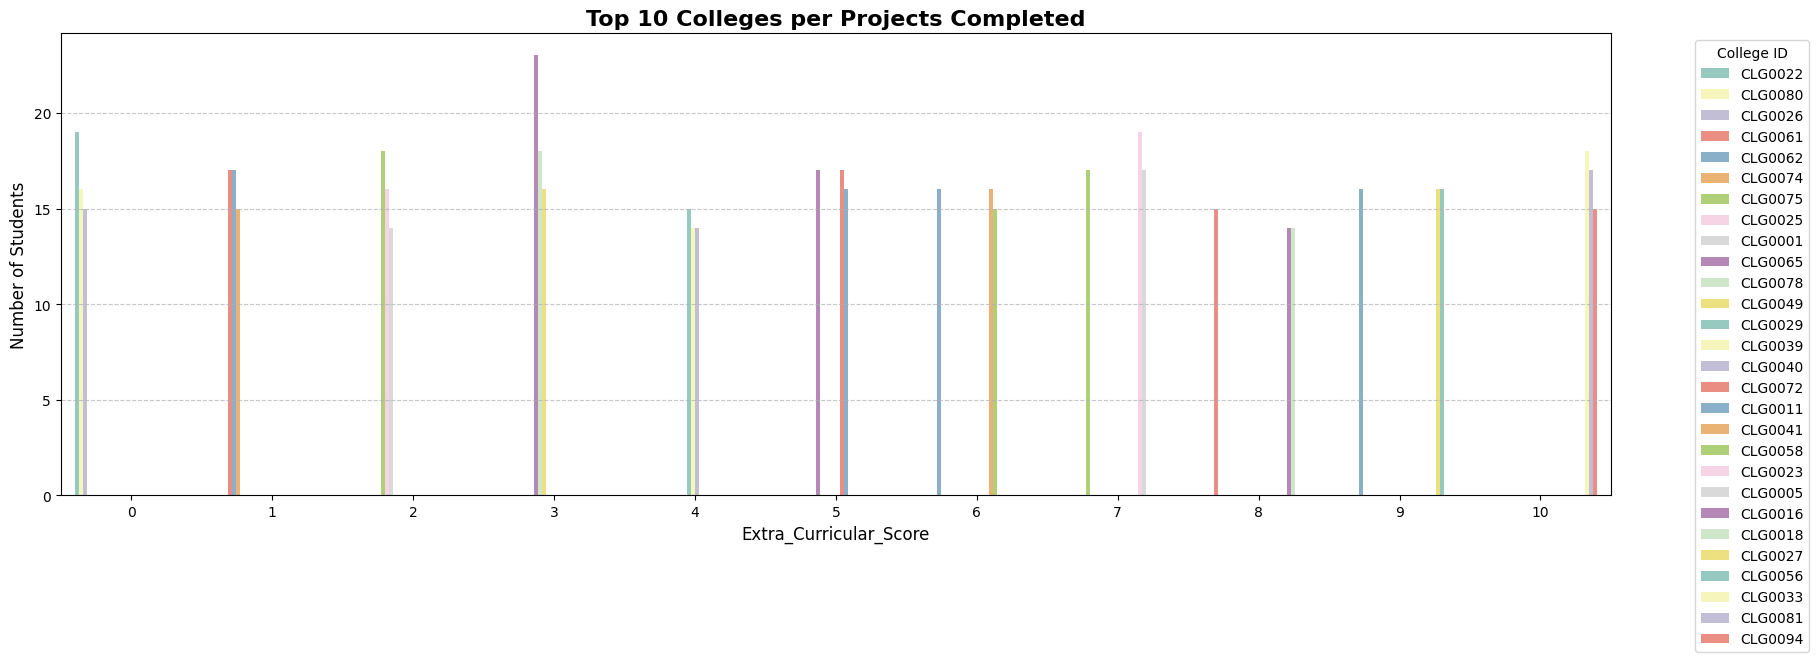

    Communication_Skills College_ID  Count
0                      1    CLG0062     21
1                      1    CLG0032     18
2                      1    CLG0053     17
3                      2    CLG0025     21
4                      2    CLG0023     18
5                      2    CLG0078     16
6                      3    CLG0058     18
7                      3    CLG0030     17
8                      3    CLG0091     16
9                      4    CLG0010     17
10                     4    CLG0026     17
11                     4    CLG0075     17
12                     5    CLG0045     20
13                     5    CLG0029     19
14                     5    CLG0013     18
15                     6    CLG0034     18
16                     6    CLG0084     17
17                     6    CLG0031     15
18                     7    CLG0073     18
19                     7    CLG0066     17
20                     7    CLG0009     16
21                     8    CLG0099     18
22         

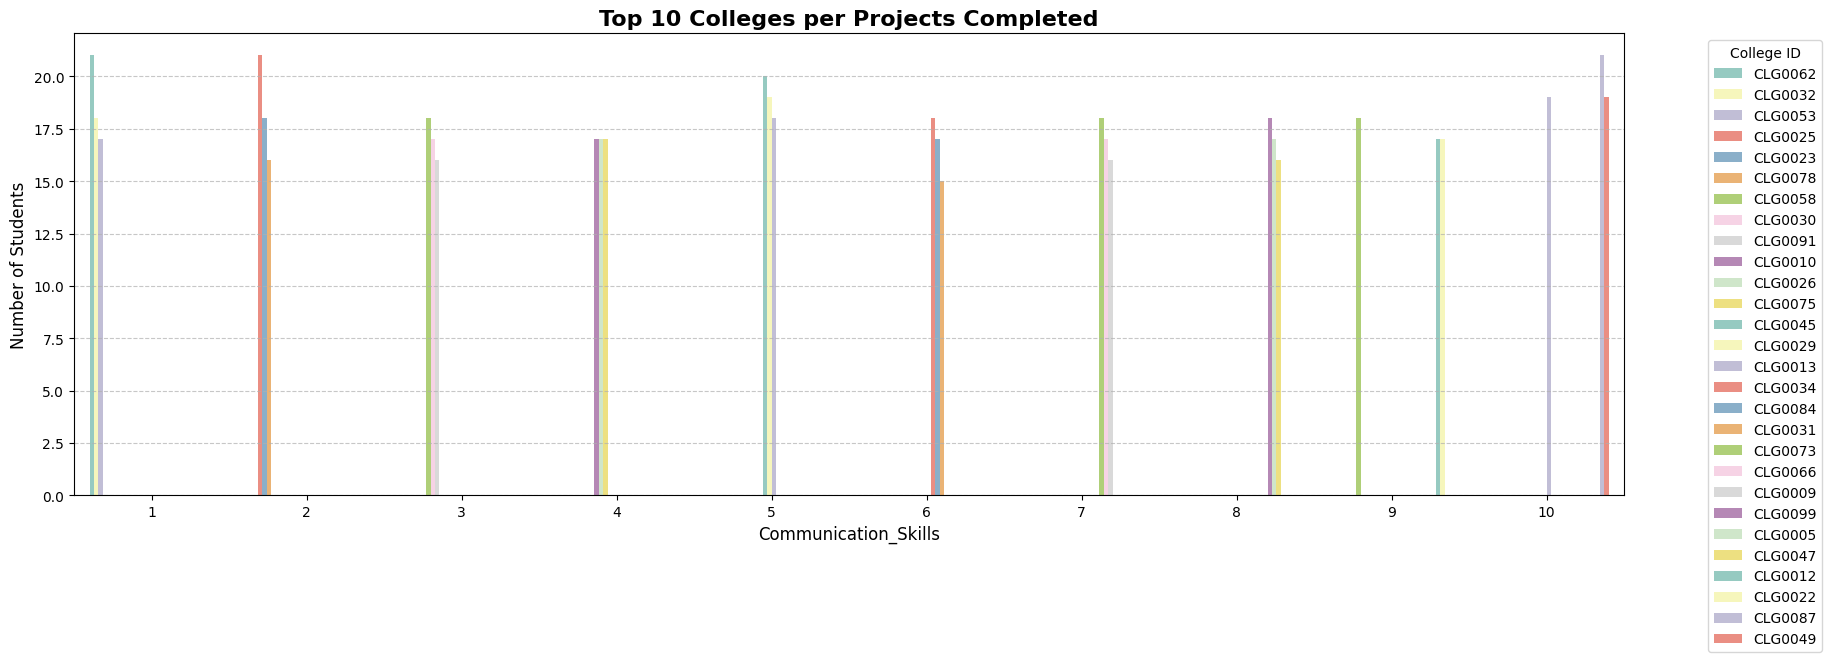

    Projects_Completed College_ID  Count
0                    0    CLG0077     26
1                    0    CLG0099     26
2                    0    CLG0064     25
3                    1    CLG0094     30
4                    1    CLG0029     25
5                    1    CLG0032     25
6                    2    CLG0065     31
7                    2    CLG0020     30
8                    2    CLG0022     25
9                    3    CLG0048     32
10                   3    CLG0100     31
11                   3    CLG0038     27
12                   4    CLG0086     29
13                   4    CLG0027     28
14                   4    CLG0071     28
15                   5    CLG0062     29
16                   5    CLG0097     28
17                   5    CLG0075     27


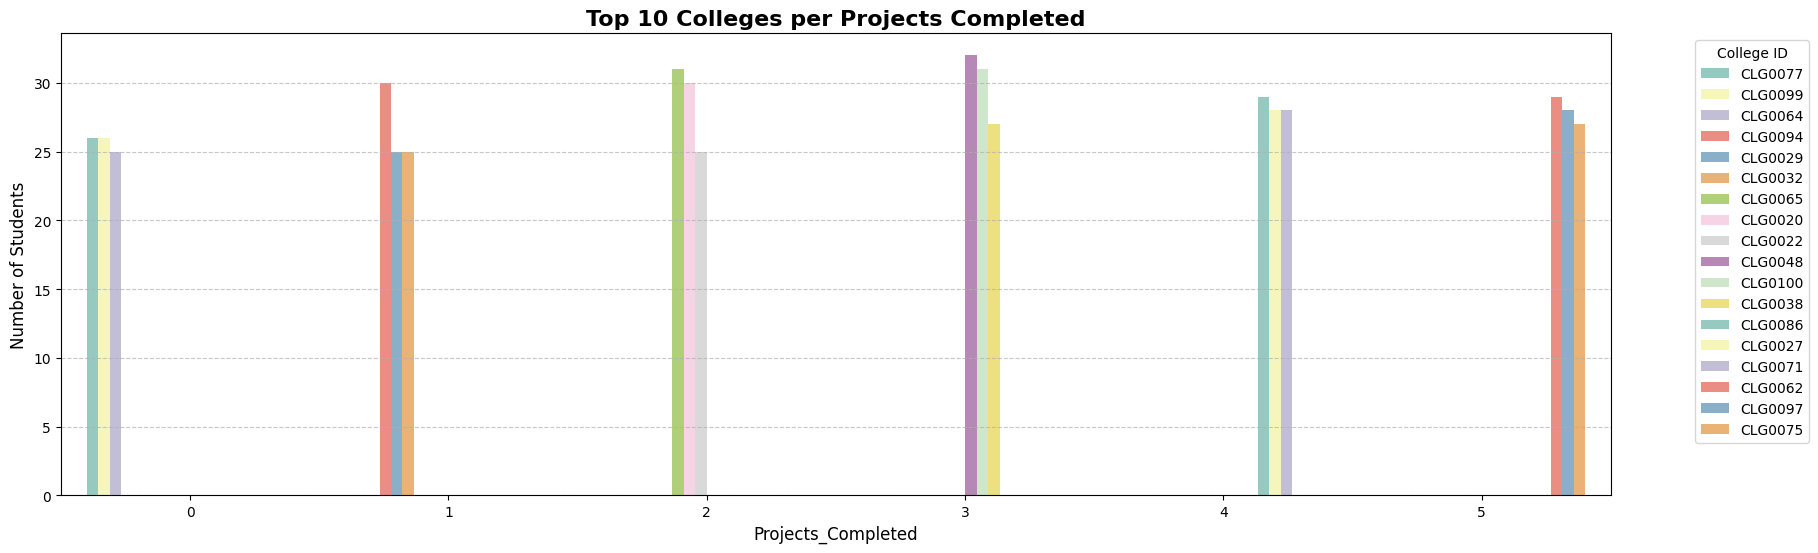

  Placement College_ID  Count
0        No    CLG0062    108
1        No    CLG0025    104
2        No    CLG0073    103
3       Yes    CLG0038     28
4       Yes    CLG0012     26
5       Yes    CLG0026     25


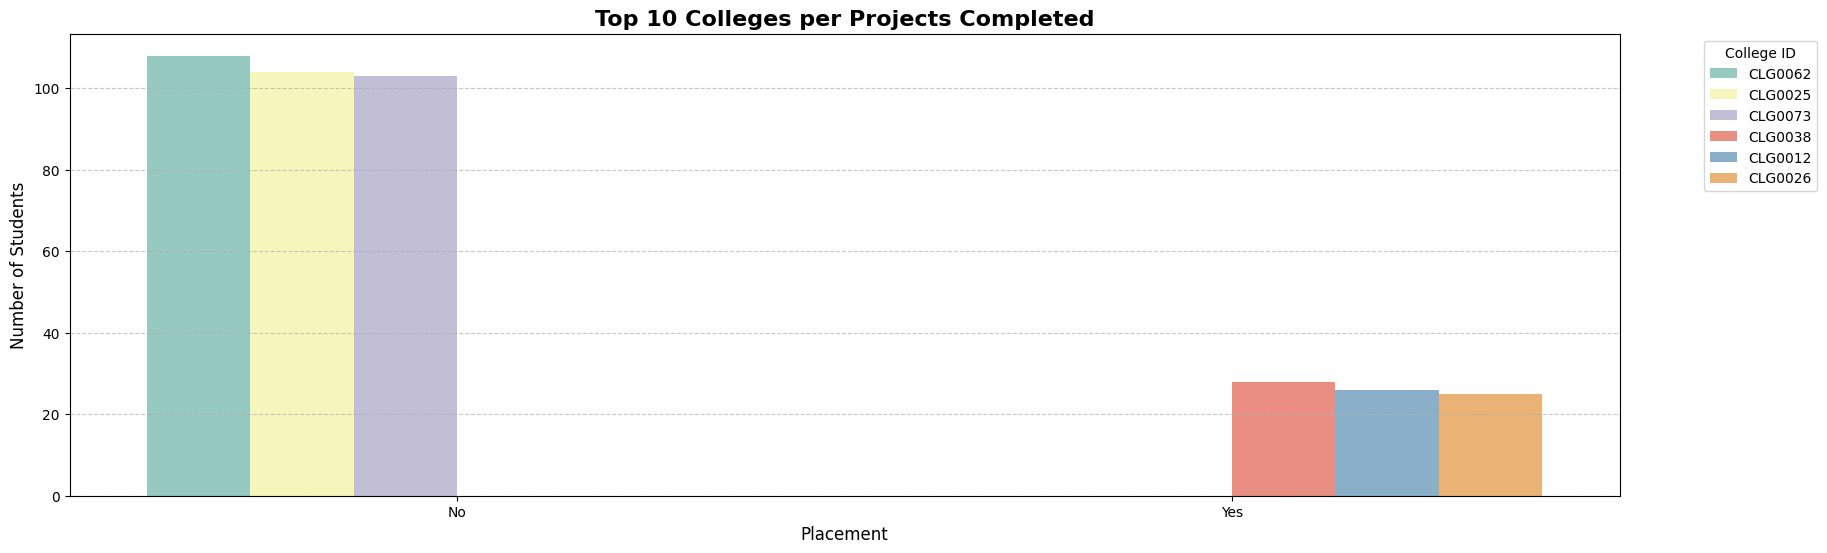

In [14]:


# Top 3 colleges per Projects_Completed
for col in catcol:
    top_colleges = (
        df.groupby(col)["College_ID"]
          .value_counts()
          .groupby(level=0, group_keys=False)
          .nlargest(3)
          .reset_index(name="Count")  # convert to DataFrame
    )
    print(top_colleges)
    
    
    
    plt.figure(figsize=(20,6))
    sns.barplot(
        x=col,
        y="Count",
        hue="College_ID",
        data=top_colleges,
        palette="Set3"
    )
    plt.title("Top 10 Colleges per Projects Completed", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Number of Students", fontsize=12)
    plt.legend(title="College ID", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    


## FEATURE ENGENEIRING

### Handling `College_ID` with Label Encoding in Different Models

#### a) Tree-based models (Decision Tree, Random Forest, XGBoost) ✅
- Trees **split on feature values** and don’t assume any order.
- Having `0, 1, 2, ..., 99` as labels is **fine**.
- The model treats it as **categorical**, even though it’s numeric.
- **Effect:** Works well, no artificial ordering problem.

#### b) Linear models (Logistic Regression, Linear Regression, SVM) ⚠️
- Linear models **treat numeric features as continuous**.
- Label-encoded integers imply an **ordinal relationship**:
  - Model sees `C001 < C002 < C003 < ... < C100`.
  - But in reality, College IDs have **no order**.
- **Effect:** Can mislead the model, reduce accuracy, or create bias toward higher-numbered colleges.

#### c) KNN (K-Nearest Neighbors) ⚠️
- KNN uses **distance between feature values**.
- Label encoding makes `C001=0` and `C100=99` appear **very far apart**, even if the actual college similarity doesn’t exist.
- **Effect:** Distance calculations become meaningless for this feature.

#### d) Neural Networks ⚠️
- Treats label-encoded integers as **numeric inputs**.
- Can learn some patterns, but still assumes an **ordinal relationship**.
- **Better option:** Use **One-Hot Encoding** or **embeddings**.


In [15]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [16]:
#  HERE WE USE LABEL ENCODER BECAUSE WE WANT TO CLASSIFY USING TREE BASED MODELS 

from sklearn.preprocessing import LabelEncoder
# Create a copy of the dataframe to keep original intact
dffinal = df.copy()
le = LabelEncoder()

# Encode College_ID
dffinal['College_ID'] = le.fit_transform(dffinal['College_ID'])
dffinal['Internship_Experience'] = le.fit_transform(dffinal['Internship_Experience'])
dffinal['Placement'] = le.fit_transform(dffinal['Placement'])


dffinal


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,29,107,6.61,6.28,8,0,8,8,4,0
1,60,97,5.52,5.37,8,0,7,8,0,0
2,35,109,5.36,5.83,9,0,3,1,1,0
3,54,122,5.47,5.75,6,1,1,6,1,0
4,3,96,7.91,7.69,7,0,8,10,2,0
...,...,...,...,...,...,...,...,...,...,...
9995,20,119,8.41,8.29,4,0,1,8,0,1
9996,97,70,9.25,9.34,7,0,0,7,2,0
9997,65,89,6.08,6.25,3,1,3,9,5,0
9998,44,107,8.77,8.92,3,0,7,5,1,0


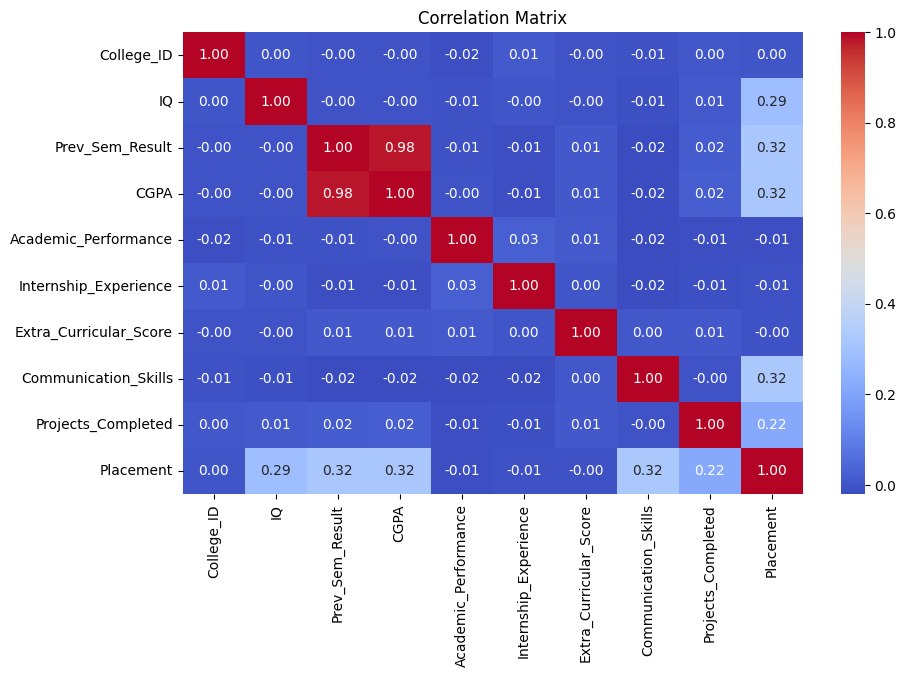

Communication_Skills      0.323155
CGPA                      0.321607
Prev_Sem_Result           0.317896
IQ                        0.285914
Projects_Completed        0.217499
College_ID                0.002750
Extra_Curricular_Score   -0.004740
Internship_Experience    -0.005841
Academic_Performance     -0.014920
Name: Placement, dtype: float64


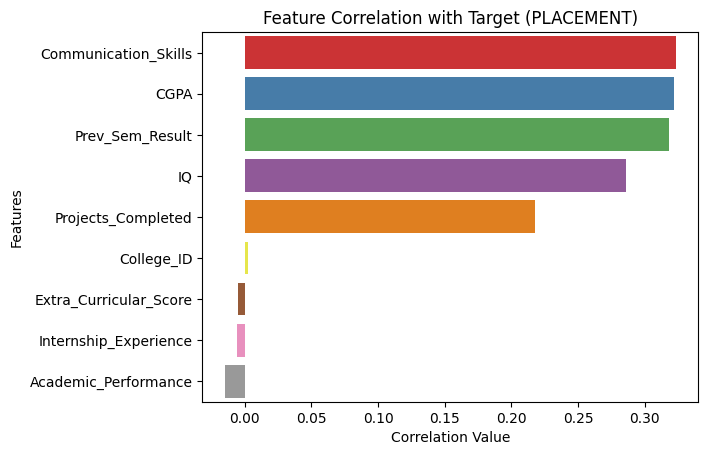

In [17]:
# LETS FIND THE CORELATION FOR UNDERSTAND FEATURE IMPORTANCE
corr = dffinal.select_dtypes(include = [np.number]).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

imp_fea = corr["Placement"].sort_values(ascending = False)[1:]
print(imp_fea)
sns.barplot(x=imp_fea.values, y=imp_fea.index, palette="Set1")
plt.title("Feature Correlation with Target (PLACEMENT)")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

### Observations from Feature Correlation with `Placement`

The correlation of different features with the target variable `Placement` is as follows:

| Feature                  | Correlation with Placement |
|---------------------------|---------------------------|
| Communication_Skills      | 0.323                     |
| CGPA                      | 0.322                     |
| Prev_Sem_Result           | 0.318                     |
| IQ                        | 0.286                     |
| Projects_Completed        | 0.217                     |
| College_ID                | 0.003                     |
| Extra_Curricular_Score    | -0.005                    |
| Internship_Experience     | -0.006                    |
| Academic_Performance      | -0.015                    |

---

#### Key Observations:

1. **Strongest positive correlations:**  
   - `Communication_Skills` (0.323), `CGPA` (0.322), and `Prev_Sem_Result` (0.318) have the highest positive correlation with `Placement`.  
   - These features are likely **most predictive** of a student being placed.

2. **Moderate positive correlation:**  
   - `IQ` (0.286) and `Projects_Completed` (0.217) also positively influence placement, but to a lesser extent.

3. **Negligible correlation:**  
   - `College_ID` (0.003), `Extra_Curricular_Score` (-0.005), `Internship_Experience` (-0.006), and `Academic_Performance` (-0.015) have almost **no correlation** with `Placement`.  
   - These features are **less likely to contribute** significantly to the prediction.

---

#### 🔹 Conclusion:

- Focus on features like `Communication_Skills`, `CGPA`, and `Prev_Sem_Result` for predictive modeling.  
- Features with near-zero correlation can be **considered for exclusion or further feature engineering** to improve model performance.


In [18]:
#train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dffinal.drop(columns =  ["Placement"]),dffinal["Placement"],test_size = 0.2,random_state = 1)

In [19]:
# lets scale inputts
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrainscale = ss.fit_transform(xtrain)
xtestscale = ss.transform(xtest)

In [20]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
logr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
boost =GradientBoostingClassifier()
adboost = AdaBoostClassifier()
bag = BaggingClassifier()
models = [logr,knn,tree,svc,forest,boost,adboost,bag]

In [21]:
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(xtrainscale,ytrain)
    print(f"{model } is succefully trained")
    print(f"accuracy score for {model } is {accuracy_score(ytest,model.predict(xtestscale))}")
    print("\n"+"="*100+"\n")

LogisticRegression() is succefully trained
accuracy score for LogisticRegression() is 0.906


KNeighborsClassifier() is succefully trained
accuracy score for KNeighborsClassifier() is 0.9285


DecisionTreeClassifier() is succefully trained
accuracy score for DecisionTreeClassifier() is 1.0


SVC() is succefully trained
accuracy score for SVC() is 0.9465


RandomForestClassifier() is succefully trained
accuracy score for RandomForestClassifier() is 1.0


GradientBoostingClassifier() is succefully trained
accuracy score for GradientBoostingClassifier() is 1.0


AdaBoostClassifier() is succefully trained
accuracy score for AdaBoostClassifier() is 1.0


BaggingClassifier() is succefully trained
accuracy score for BaggingClassifier() is 1.0




### Conclusion on the Effect of Label Encoding on Different Models

From the classification results:

| Model                          | Accuracy Score |
|--------------------------------|----------------|
| LogisticRegression()            | 0.906          |
| KNeighborsClassifier()          | 0.9285         |
| DecisionTreeClassifier()        | 1.0            |
| SVC()                           | 0.9465         |
| RandomForestClassifier()        | 1.0            |
| GradientBoostingClassifier()    | 1.0            |
| AdaBoostClassifier()            | 1.0            |
| BaggingClassifier()             | 1.0            |

---

#### Observations:

1. **Tree-based models** (`DecisionTree`, `RandomForest`, `GradientBoosting`, `AdaBoost`, `Bagging`) achieved **perfect accuracy (1.0)**.
    - This indicates that **label encoding `College_ID` did not negatively affect these models**.
    - Tree-based models **do not assume any ordinal relationship** between encoded values.
    - They can effectively split on `College_ID` and other features to learn the target patterns.

2. **Linear and distance-based models** (`LogisticRegression`, `KNeighborsClassifier`, `SVC`) had slightly lower accuracy.
    - Label encoding introduces a **fake ordinal relationship** between colleges.
    - Linear models and KNN/SVM may interpret this as meaningful order, which can **slightly mislead the model**.

---

#### ✅ Conclusion:

- Using **Label Encoding** for `College_ID` is **suitable for tree-based models**, as these models are **robust to high-cardinality categorical features**.
- For **linear or distance-based models**, label encoding may **introduce bias**, so alternative encoding methods (like **target encoding** or **one-hot encoding**) may improve performance.


**In conclusion, this analysis highlights the key academic and professional factors influencing student placements, providing actionable insights for both students and educational institutions.**
